In [150]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LogisticRegression
import numpy as np
from sklearn.preprocessing import StandardScaler, Normalizer, scale
from sklearn.utils import resample
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, log_loss, auc, roc_curve, roc_auc_score, recall_score, precision_recall_curve
from sklearn.metrics import make_scorer, precision_score, fbeta_score, f1_score, classification_report
from sklearn.feature_selection import SelectPercentile, f_classif
from sklearn import svm
from sklearn.preprocessing import LabelEncoder

In [145]:
df = pd.read_csv('diabetes_csv.csv')
labels = ['tested_positive','tested_negative']
enc = LabelEncoder().fit(labels)


In [134]:

df.columns = [x.lower() for x in df.columns]
df.rename(columns ={'tested_positive':'class'},inplace = True)


In [135]:
df['class'].value_counts()

tested_negative    500
tested_positive    268
Name: class, dtype: int64

In [136]:
Feature_names = df[['preg','plas','pres','skin','insu','mass','pedi','age']] 
target = df['class']

X = Feature_names
y = target

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)

In [137]:
print (X_train.shape)
print (y_train.shape)

(614, 8)
(614L,)


In [138]:
print (X_test.shape)
print (y_test.shape)

(154, 8)
(154L,)


In [139]:
classifier = svm.SVC(kernel= 'linear',C = 1.0)
classifier.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [ ]:
# Logistic Regression

In [120]:
logreg = LogisticRegression()
logreg.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [121]:
predict_y = logreg.predict(X_test)

In [ ]:
# K Nearest Neighbor

In [148]:
print df.columns

Index([u'preg', u'plas', u'pres', u'skin', u'insu', u'mass', u'pedi', u'age',
       u'class'],
      dtype='object')


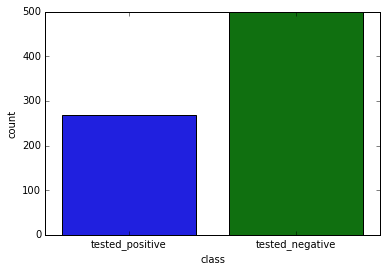

In [151]:
sns.countplot(df['class'],label = "count")

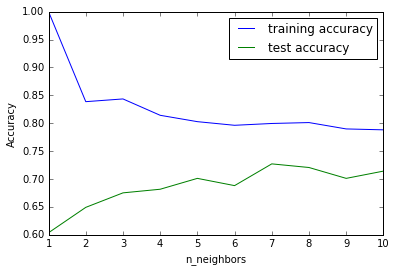

In [158]:
from sklearn.neighbors import KNeighborsClassifier
training_accuracy = []
test_accuracy = []
# try n_neighbors from 1 to 10
neighbors_settings = range(1, 11)
for n_neighbors in neighbors_settings:
    # build the model
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(knn.score(X_train, y_train))
    # record test set accuracy
    test_accuracy.append(knn.score(X_test, y_test))
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()
    

In [172]:
Clf = KNeighborsClassifier(n_neighbors = 9)
Clf.fit(X_train,y_train)
y_predict = Clf.predict(X_test)
Accuracy = accuracy_score(y_predict,y_test)
print 'Accuracy is:',Accuracy

Accuracy is: 0.701298701299


In [173]:
# DecisionTreeClassifier

In [178]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth = 3,random_state = 0)
tree.fit(X_train,y_train)
y_predict = tree.predict(X_test)
Accuracy = accuracy_score(y_predict,y_test)
print 'Accuracy is:',Accuracy
print 'tree.feature_importances:',tree.feature_importances_

Accuracy is: 0.74025974026
tree.feature_importances: [ 0.          0.67281114  0.          0.          0.          0.22422392
  0.          0.10296494]
